# 연습문제 1: 기상자료개방포털에서 본인이 태어난 지역의 “2000년-2010년”에 대한 데이터를 다운 받은 후 문제를 해결해보자.

## 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
weather=pd.read_csv('/content/drive/MyDrive/(2000-2010) weather.csv')
weather.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2000-01-01,108,5.5,1.8,9.9
1,2000-01-02,108,4.2,-0.9,6.9
2,2000-01-03,108,-2.2,-4.6,0.1
3,2000-01-04,108,0.3,-4.3,4.3
4,2000-01-05,108,2.8,0.1,4.6


## 문제1) 다음은 데이터를 분석하기 전 전처리에 대한 과정이다. 실행 결과를 보고 빈곳에 가장 알맞은 코드를 작성하시오.

In [ ]:
# 날짜컬럼자료형을 날짜형식으로 변경
weather['날짜']=pd.to_datetime(weather['날짜'])
print(weather.info())
# 컬럼 생성
weather['year']=weather['날짜'].dt.year
weather['month']=weather['날짜'].dt.month
weather['day']=weather['날짜'].dt.day
# 컬럼 삭제
weather.drop('지점',axis=1,inplace=True)
# 컬럼명 변경
weather.rename(columns={'날짜':'date','평균기온(℃)':'temp'},inplace=True)
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4018 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB
None


,date,temp,최저기온(℃),최고기온(℃),year,month,day
0,2000-01-01,5.5,1.8,9.9,2000,1,1
1,2000-01-02,4.2,-0.9,6.9,2000,1,2
2,2000-01-03,-2.2,-4.6,0.1,2000,1,3
3,2000-01-04,0.3,-4.3,4.3,2000,1,4
4,2000-01-05,2.8,0.1,4.6,2000,1,5


## 문제1-2) 다음은 데이터 분석에 사용할 데이터를 필터링한 후 새로운 데이터프레임을 생성하는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

In [ ]:
weather=weather[['date','temp','year','month','day']]
conditions=(weather['date'].dt.month==9) & (weather['date'].dt.day==1)
conditions
df0901=weather[conditions]
df0901

,date,temp,year,month,day
244,2000-09-01,24.4,2000,9,1
609,2001-09-01,26.1,2001,9,1
974,2002-09-01,23.5,2002,9,1
1339,2003-09-01,22.0,2003,9,1
1705,2004-09-01,24.7,2004,9,1
2070,2005-09-01,26.8,2005,9,1
2435,2006-09-01,24.2,2006,9,1
2800,2007-09-01,20.4,2007,9,1
3166,2008-09-01,19.7,2008,9,1
3531,2009-09-01,23.7,2009,9,1


## 문제1-3) 다음은 year, temp 데이터에 대한 산점도 그래프를 그리는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

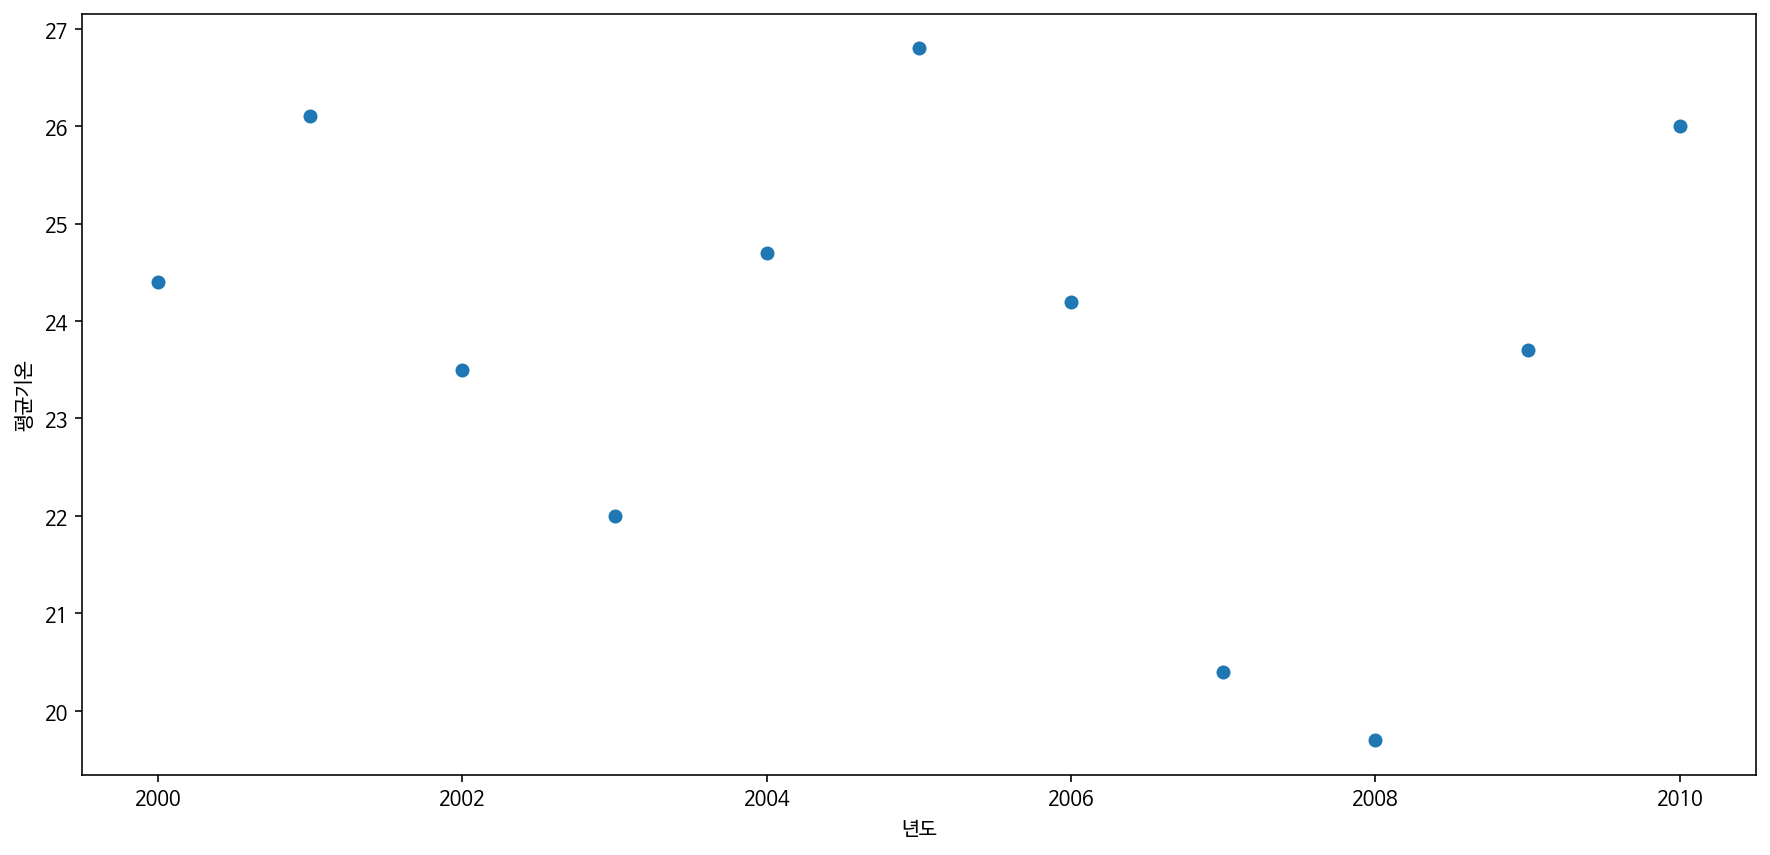

In [ ]:
fig = plt.figure(figsize=(15,7))
X = df0901[['year']]
Y = df0901['temp']
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.scatter(X,Y)
plt.show()

In [ ]:
# 단순선형회귀분석 : 2022년 09월1일 개강일의 기온예측하기
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
X = df0901[['year']]
Y = df0901['temp']
model.fit(X, Y) #  LinearRegression 모델을 생성하고, 그 안에 X, y 데이터를 fit 시킨다
result = model.predict([['2022']]) # [21.19181818] 예측된 값
print(result)   

[21.19181818]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


# 연습문제 2 : 키,몸무게 데이터를 분석

In [ ]:
#  필요한 모듈 불러오기
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 엑셀 파일로 키와 몸무게가 들어 있는 파일을 불러온 후 확인한다.
df = pd.read_excel('/content/drive/MyDrive/health_screenings_2020_1000ea.xlsx')
df.head()

,year,city_code,gender,age_code,height,weight
0,2020,11,1,10,175,65
1,2020,11,2,15,150,60
2,2020,41,2,15,155,60
3,2020,41,1,9,165,60
4,2020,31,1,9,160,55


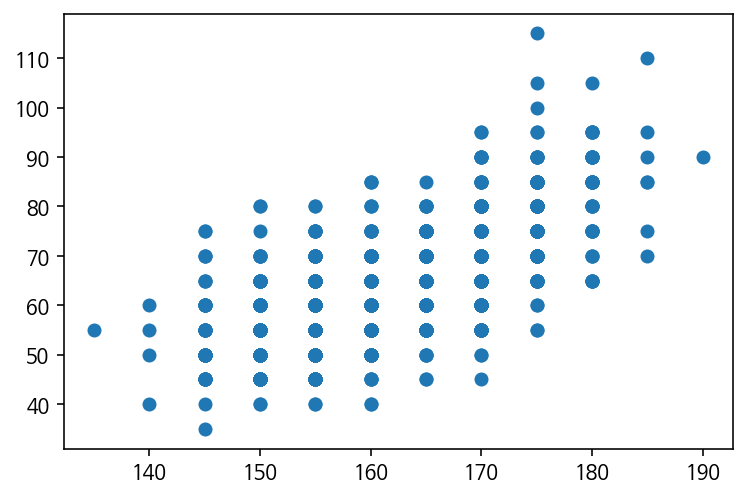

In [ ]:
# 데이터 시각화
X = df['height']
Y = df['weight']
plt.plot(X, Y, 'o')
plt.show()

## 문제2-1) 학습모델을 생성하고 데이터를 fit시키는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

예상몸무게 [82.81082122]


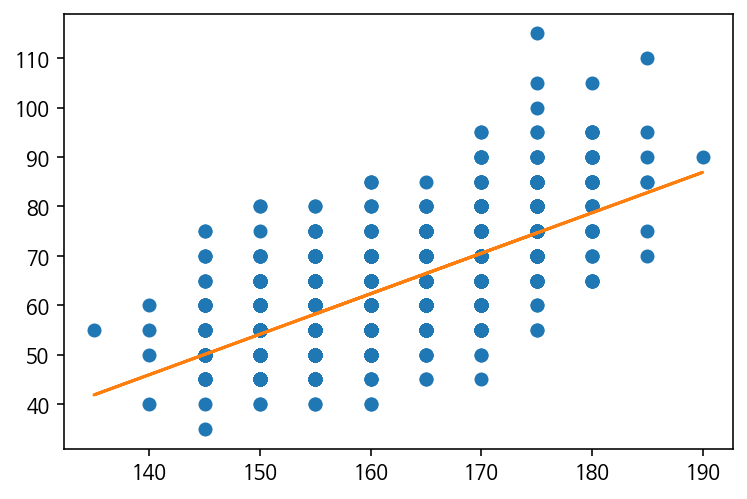

In [ ]:
# 학습 모델 생성하고 데이터를 fit시킨다.
model = LinearRegression()
model.fit(X.values.reshape(-1,1), Y)
# 예측
print('예상몸무게',model.predict([[185]])) # array([82.81082122])
# 기존 X 값으로 y를 예측하게 해서 그래프를 그려보자.
plt.plot(X, Y, 'o')
plt.plot(X,model.predict(X.values.reshape(-1,1)))
plt.show()

## 문제2-2) 다음은 시본모듈을 이용하여 추세선을 넣는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

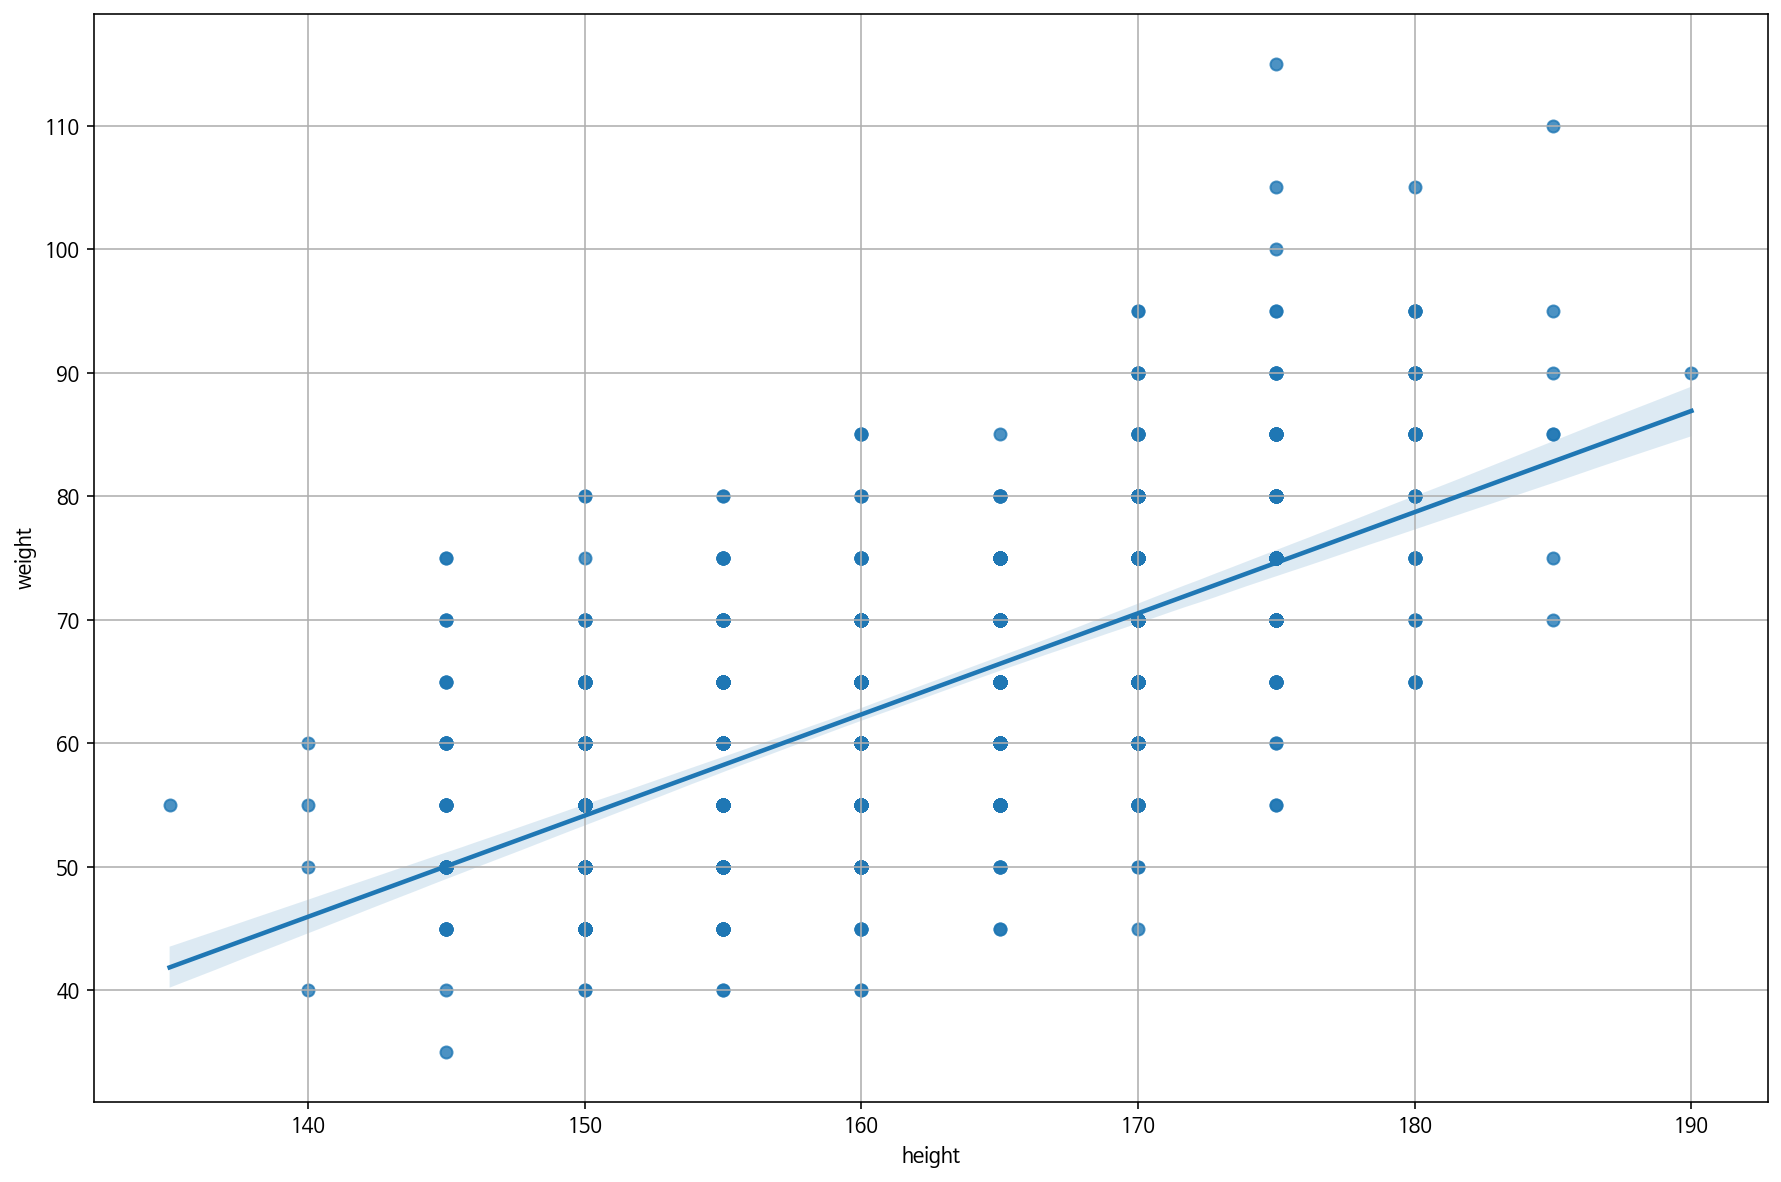

In [ ]:
# 시본 모듈로 추세선 넣기
fig = plt.figure(figsize=(15, 10))   
sns.regplot(x='height', y='weight', data=df) 
plt.grid()
plt.show()

# 연습문제 3: 다중선형회귀분석

In [ ]:
# 데이터불러오기
import pandas as pd
manhattan = pd.read_csv('/content/drive/MyDrive/manhattan.csv')
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## 문제3-1) 다음은 데이터 세트 Training & Test 7:3로 분리하고 학습모델을 생성하는 코드이다. 그리고 직접 데이터를 입력하여 주택 임대료를 예측하는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

In [ ]:
# 데이터 세트 분리하기 (Training & Test) 7:3로 분리
from sklearn.model_selection import train_test_split
x = manhattan[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = manhattan[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)
# 학습모델 생성하기
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train) 
# 직접데이터를 입력하여 주택 임대료를 예측한다.
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
my_predict = model.predict(my_apartment)
my_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[2453.68248716]])

## 문제3-2) 다음은 x_test 데이터를 이용하여 y_predict를 예측하는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 완성하시오.

In [ ]:
y_predict = model.predict(x_test)
y_predict[:10]

array([[3625.58335034],
       [7206.53106241],
       [2516.79957537],
       [3821.05641875],
       [7131.71985528],
       [3984.52696825],
       [2909.87309365],
       [9675.769998  ],
       [3356.55562086],
       [7508.38245276]])

## 문제 3-3) 다음 코드는 실제 임대료와 예측 임대료에 대한 산점도 그래프이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 완성하시오.

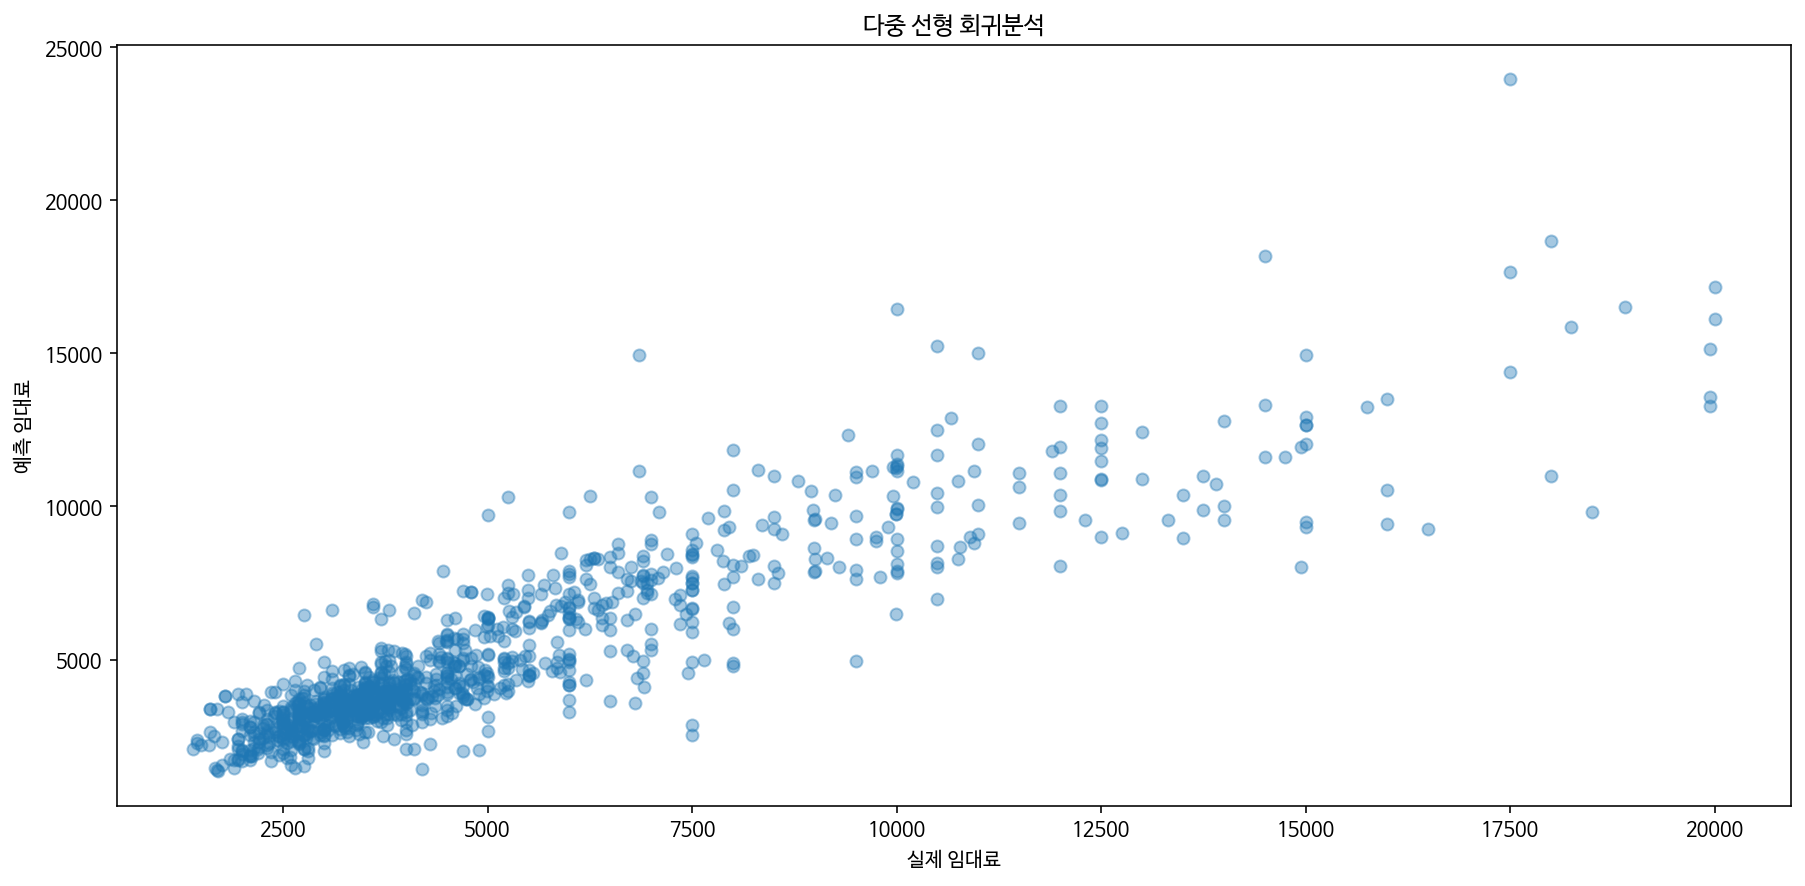

In [ ]:
'''
matplotlib의 시각화를 통해 간단히 확인하고 넘어가보자.
x축은 실제 임대료, y축은 예측한 임대료다. 
'''
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,7))
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel('실제 임대료')
plt.ylabel('예측 임대료')
plt.title('다중 선형 회귀분석')
plt.show()

## 문제 3-4) 다음은 다중선형회귀 모델의 성능을 측정하기 위한 코드이다. 결정계수의 값을 구하는 적절한 함수를 쓰시오.

In [ ]:
print(model.score(x_train, y_train))
'''
주택 임대료의 77%를 저 14개의 항목으로 설명할 수 있다는 의미다.
'''

0.7688828880196837


'\n주택 임대료의 77%를 저 14개의 항목으로 설명할 수 있다는 의미다.\n'